In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dog(img, k, sigma, p, size=(0, 0)):
    img1 = cv2.GaussianBlur(img, size, sigma)
    img2 = cv2.GaussianBlur(img, size, sigma * k)

    return ((1 + p) * img1) - p * img2

def thresholding(img, epsilon, phi):
    img = img / 255
    mask = img >= epsilon
    img[mask] = 1
    img[~mask] = 1 + np.tanh(phi * (img[~mask] - epsilon))
    img = img * 255
    return img

def xdog(img, k, sigma, p, epsilon, phi):
    dimg = dog(img, k, sigma, p)
    thresh = thresholding(dimg, epsilon, phi)
    thresh = np.stack((thresh, thresh, thresh), axis=2).astype(np.uint8)
    return thresh

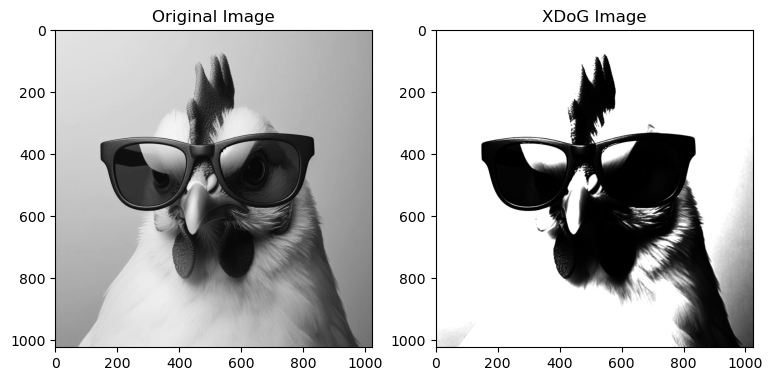

In [6]:
img = cv2.imread("./image/hen.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
result = xdog(img,1.6,1.4,1,0.6,6)
# result = xdog(img,1.6,0.8,1,0.2,10)
# result = xdog(img,2,0.9,0.5,0.5,8)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(result,cmap='gray')
plt.title("XDoG Image")
plt.show()

interactive(children=(FloatSlider(value=2.0, description='k', max=3.0, min=1.0), FloatSlider(value=1.500000000…

<function __main__.update(k, sigma, p, epsilon, phi)>

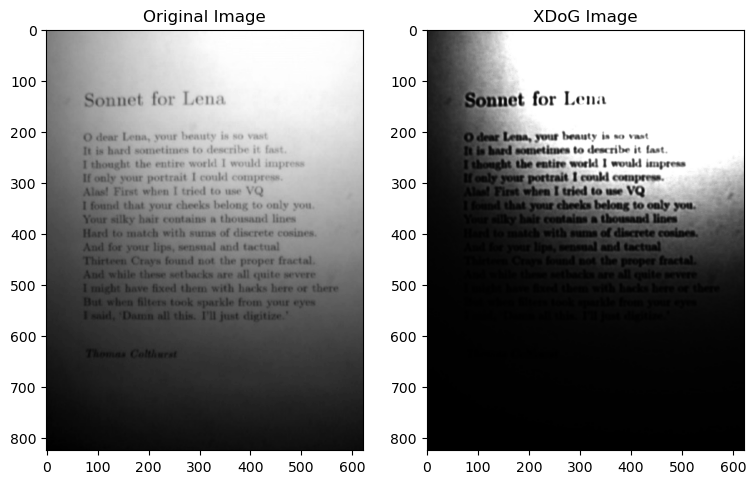

In [11]:
# use interactive slider to adjust the parameters
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2

# load image
img = cv2.imread("./image/test2.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# convert to grayscale
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# plot the images in 16 by 9 aspect ratio
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img,cmap='gray')
ax.set_title("Original Image")

# ax = fig.add_subplot(1, 2, 2)
# ax.imshow(img,cmap='gray')
# ax.set_title("XDoG Image")

# define the function to be called when the slider is adjusted
def update(k,sigma,p,epsilon,phi):
    result = xdog(img,k,sigma,p,epsilon,phi)
    # plt.imshow(result,cmap='gray')
    # plt.title("XDoG Image")
    # plt.show()
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(result,cmap='gray')
    ax.set_title("XDoG Image")
    fig.canvas.draw_idle()

# create the sliders
interact(update, k=(1, 3, 0.1), sigma=(0.1, 3, 0.1), p=(0.1, 3, 0.1), epsilon=(0.1, 1.5, 0.01), phi=(0.1, 10, 0.1))


In [7]:
# open the webcam and apply the above xdog function on the frames and show it in real time using cv2.imshow()

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # result = xdog(frame,1.6,1.4,1,0.6,6)  # for clean fall-off image
    # result = xdog(img, k, sigma, p, epsilon, phi)
    # add sliders to change the parameters in real time
    


    result = xdog(frame,1.6,0.8,1,0.2,10)
    cv2.imshow('frame',result)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [2]:
# %matplotlib notebook
# from ipywidgets import *
# import numpy as np
# import matplotlib.pyplot as plt

# x = np.linspace(0, 2 * np.pi)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot(x, np.si(x))

# def update(w = 1.0):
#     line.set_ydata(np.sin(w * x))
#     print(w)
#     fig.canvas.draw_idle()

# interact(update);

# %matplotlib notebook
# from ipywidgets import *
# import numpy as np
# import matplotlib.pyplot as plt

# cap = cv2.VideoCapture(0)

# # use matplotlib and sliders to change the parameters in real time of the webcam feed
# def update(k=1.6,sigma=0.8,p=1,epsilon=0.2,phi=10):
#     return k, sigma, p, epsilon, phi

# while True:
#     ret, frame = cap.read()
#     frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     k, sigma, p, epsilon, phi = update()
#     result = xdog(frame,k,sigma,p,epsilon,phi)
#     cv2.imshow('frame',result)
#     # print(k,sigma,p,epsilon,phi)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

# interact(update,k=(0,10,0.1),sigma=(0,10,0.1),p=(0,10,0.1),epsilon=(0,10,0.1),phi=(0,20,0.1));

import cv2
import numpy as np

def nothing(x):
    pass

# Open webcam
cap = cv2.VideoCapture(0)  # 0 corresponds to the default webcam, you may need to change it

# Create a window
cv2.namedWindow('XDoG')

# create trackbars for XDoG parameters
cv2.createTrackbar('k', 'XDoG', 1, 200, nothing)
cv2.createTrackbar('sigma', 'XDoG', 1, 1000, nothing)
cv2.createTrackbar('p', 'XDoG', 1, 1000, nothing)
cv2.createTrackbar('epsilon', 'XDoG', 1, 1000, nothing)
cv2.createTrackbar('phi', 'XDoG', 1, 500, nothing)

while True:
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # get current positions of trackbars
    k = cv2.getTrackbarPos('k', 'XDoG') / 10.0
    sigma = cv2.getTrackbarPos('sigma', 'XDoG') / 100.0
    p = cv2.getTrackbarPos('p', 'XDoG') / 100.0
    epsilon = cv2.getTrackbarPos('epsilon', 'XDoG') / 100.0
    phi = cv2.getTrackbarPos('phi', 'XDoG') / 10.0

    # apply XDoG filter
    result = xdog(frame_gray, k, sigma, p, epsilon, phi)

    # Display the original and processed frames
    # cv2.imshow('Original', frame)
    cv2.imshow('XDoG', result)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


2023-12-04 17:53:55.325 python[43783:19762723] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
import cv2

cap = cv2.VideoCapture(0)

@interact(k=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.6),
          sigma=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=0.8),
          p=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0),
          epsilon=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=0.2),
          phi=widgets.IntSlider(min=1, max=20, step=1, value=10))
def process_frame(k, sigma, p, epsilon, phi):
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Exit the loop if the frame is empty
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        result = xdog(frame, k, sigma, p, epsilon, phi)
        cv2.imshow('frame', result)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()